## Final Project Submission

Please fill out:
* Student name: Winnie Nzuve
* Student pace: Hybrid
* Scheduled project review date/time: 04/12/2023
* Instructor name: Mark Tiiba
* Blog post URL:


In [4]:
import pandas as pd
import numpy as np
import csv
import shutil
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import sqlite3
conn = sqlite3.connect('im.db')


## LOADING DATASETS

In [91]:
# Loading the datasets
bom_movies = pd.read_csv('bom.movie_gross.csv')
rt_movies = pd.read_csv('rt.movie_info.tsv', sep='\t')
rt_reviews = pd.read_csv('rt.reviews.tsv', sep='\t', encoding= 'latin1')
tmdb_movies = pd.read_csv('tmdb.movies.csv')
movie_budgets = pd.read_csv('tn.movie_budgets.csv')

## CHECKING DATASETS

In [6]:
#checking information from the bom movies dataframe
bom_movies = pd.read_csv('bom.movie_gross.csv')
bom_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [7]:
bom_movies.shape

(3387, 5)

In [8]:
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [9]:
bom_movies.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [10]:
#checking information on rotten tomatoes
rt_movies = pd.read_csv('rt.movie_info.tsv', sep='\t')
rt_movies

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [11]:
rt_movies.shape

(1560, 12)

In [12]:
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [13]:
rt_movies.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [14]:
#checking on the rotten tomatoes reviews
rt_reviews = pd.read_csv('rt.reviews.tsv', sep='\t', encoding= 'latin1')
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [15]:
rt_reviews.shape

(54432, 8)

In [16]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [17]:
rt_reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [18]:
#checking on tmdb movies dataframe
tmdb_movies = pd.read_csv('tmdb.movies.csv')
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [19]:
tmdb_movies.shape

(26517, 10)

In [20]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [21]:
tmdb_movies.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [22]:
#checking on movie budgets dataframe
movie_budgets = pd.read_csv('tn.movie_budgets.csv')
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [23]:
movie_budgets.shape

(5782, 6)

In [24]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [25]:
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

## CLEANING MISSING VALUES 

### From the information above, we have missing values in the rt_movies, bom_movies and rt_reviews dataframes.

In [26]:
bom_movies.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [27]:
# Identify the columns with missing values
columns_w_na = ['studio', 'domestic_gross', 'foreign_gross']

# Calculate the percentage of missing values
percentage_missing = bom_movies[columns_w_na].isnull().mean() * 100

for column in percentage_missing.index:
    print("Percentage of missing values in column '{}': {:.2f}%".format(column,percentage_missing[column])) 

Percentage of missing values in column 'studio': 0.15%
Percentage of missing values in column 'domestic_gross': 0.83%
Percentage of missing values in column 'foreign_gross': 39.86%


In [28]:
#replace missing values domestic gross with mean and drop missing values in studio.
mean_domestic_gross = bom_movies['domestic_gross'].mean()
bom_movies['domestic_gross'].fillna(mean_domestic_gross, inplace=True)

bom_movies.dropna(subset=['studio'], inplace=True)



In [29]:
bom_movies['foreign_gross'].head()

0    652000000
1    691300000
2    664300000
3    535700000
4    513900000
Name: foreign_gross, dtype: object

In [30]:
# Replace NaN values with 0 in the 'foreign_gross' column for easier cleaning
bom_movies['foreign_gross'].fillna(0, inplace=True)


# Convert 'foreign_gross' column to numeric (float) data type
bom_movies['foreign_gross'] = pd.to_numeric(bom_movies['foreign_gross'], errors='coerce')

# Display the first few rows to verify the changes
print(bom_movies.info())


<class 'pandas.core.frame.DataFrame'>
Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3377 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB
None


In [31]:
#checking for duplicates
duplicates = bom_movies[bom_movies.duplicated()]
len(duplicates)

0

In [32]:
rt_reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [99]:
rt_reviews= rt_reviews.dropna()

In [34]:
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"
...,...,...,...,...,...,...,...,...
54419,2000,"Sleek, shallow, but frequently amusing.",2.5/4,fresh,Gene Seymour,1,Newsday,"September 27, 2002"
54420,2000,The spaniel-eyed Jean Reno infuses Hubert with...,3/4,fresh,Megan Turner,1,New York Post,"September 27, 2002"
54421,2000,"Manages to be somewhat well-acted, not badly a...",1.5/4,rotten,Bob Strauss,0,Los Angeles Daily News,"September 27, 2002"
54422,2000,Arguably the best script that Besson has writt...,3.5/5,fresh,Wade Major,0,Boxoffice Magazine,"September 27, 2002"


In [35]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33988 entries, 0 to 54424
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          33988 non-null  int64 
 1   review      33988 non-null  object
 2   rating      33988 non-null  object
 3   fresh       33988 non-null  object
 4   critic      33988 non-null  object
 5   top_critic  33988 non-null  int64 
 6   publisher   33988 non-null  object
 7   date        33988 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.3+ MB


In [36]:
#checking for duplicates
duplicates = rt_reviews[rt_reviews.duplicated()]
len(duplicates)

0

In [37]:
rt_movies.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [101]:
rt_movies.dropna(subset=['synopsis', 'director', 'writer', 'theater_date', 'dvd_date', 'runtime', 'studio',  'currency', 'rating', 'genre', 'box_office'], inplace=True)


In [102]:
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            235 non-null    int64 
 1   synopsis      235 non-null    object
 2   rating        235 non-null    object
 3   genre         235 non-null    object
 4   director      235 non-null    object
 5   writer        235 non-null    object
 6   theater_date  235 non-null    object
 7   dvd_date      235 non-null    object
 8   currency      235 non-null    object
 9   box_office    235 non-null    object
 10  runtime       235 non-null    object
 11  studio        235 non-null    object
dtypes: int64(1), object(11)
memory usage: 23.9+ KB


In [103]:
rt_movies.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

In [40]:
duplicates =rt_movies[rt_movies.duplicated()]
len(duplicates)

0

In [41]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [42]:
duplicates =tmdb_movies[tmdb_movies.duplicated()]
len(duplicates)

0

In [43]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [44]:
duplicates = movie_budgets[movie_budgets.duplicated()]
len(duplicates)

0

## Exploratory Data Analysis (EDA)

* Analysis of Box Office Earnings
* Explore the distribution of box office earnings.
* Investigate top-performing movies based on earnings.
* Analyze the popularity of different genres.
* Determine which genres tend to have higher box office earnings.
* Identify trends regarding release dates (seasonality, month/day of the week).
* Explore the impact of movie ratings on box office success.

In [45]:
bom_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018
3384,El Pacto,Sony,2500.0,0.0,2018
3385,The Swan,Synergetic,2400.0,0.0,2018


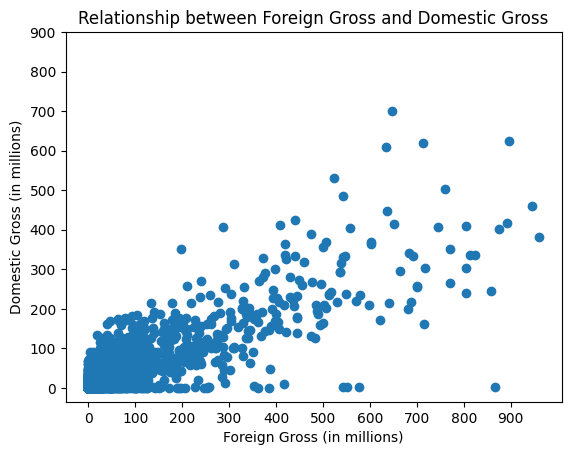

In [46]:
# Create a scatter plot
plt.scatter(bom_movies['foreign_gross'], bom_movies['domestic_gross'], color='tab:blue')
plt.xlabel('Foreign Gross (in millions)')
plt.ylabel('Domestic Gross (in millions)')
plt.title('Relationship between Foreign Gross and Domestic Gross')

# Set the tick values
x_ticks = range(0, int(max(bom_movies['foreign_gross'])/1000000) + 1, 100)
y_ticks = range(0, int(max(bom_movies['domestic_gross'])/1000000) + 1, 100)

# Convert tick values to millions
x_ticks_millions = [x * 1000000 for x in x_ticks]
y_ticks_millions = [y * 1000000 for y in y_ticks]

# Set the modified tick values
plt.xticks(x_ticks_millions, x_ticks)
plt.yticks(y_ticks_millions, y_ticks)

plt.show()

In [47]:
# Create a new column "total_gross"
bom_movies['total_gross'] = bom_movies.copy()['domestic_gross'] + bom_movies['foreign_gross']

bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [48]:
# Count the number of unique studios
unique_studios = bom_movies['studio'].nunique()

print("Number of unique studios:", unique_studios)

Number of unique studios: 257


In [49]:
# Find the index of the row with the highest total gross
highest_total_gross_index = bom_movies['total_gross'].idxmax()

movie_highest_total_gross = bom_movies.loc[highest_total_gross_index, 'title']

# Print the movie with the highest total gross
print("Movie with the highest total gross:", movie_highest_total_gross)


Movie with the highest total gross: Marvel's The Avengers


In [50]:
top_ten_movies = bom_movies.nlargest(10, 'total_gross')

# Display the list of top ten movies
print("Top ten movies by total gross:")
print(top_ten_movies[['title', 'total_gross']])


Top ten movies by total gross:
                                            title   total_gross
727                         Marvel's The Avengers  1.518900e+09
1875                      Avengers: Age of Ultron  1.405400e+09
3080                                Black Panther  1.347000e+09
328   Harry Potter and the Deathly Hallows Part 2  1.341500e+09
2758                     Star Wars: The Last Jedi  1.332600e+09
3081               Jurassic World: Fallen Kingdom  1.309500e+09
1127                                       Frozen  1.276400e+09
2759                  Beauty and the Beast (2017)  1.263500e+09
3082                                Incredibles 2  1.242800e+09
1128                                   Iron Man 3  1.214800e+09


In [51]:
tmdb_movies
# Extract and anlyse ratings from tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


Minimum Rating: 0.0
Maximum Rating: 10.0
The mean value of the ratings column is 5.991, median value is 6.0.    
The standard deviation is 1.853.


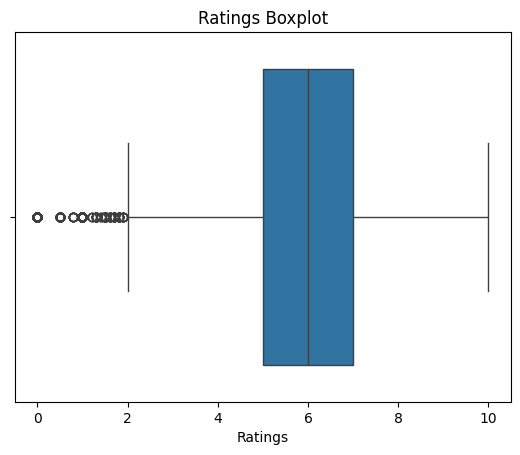

In [52]:
ratings_tmdb = tmdb_movies['vote_average']

# Calculate the minimum and maximum values
min_rating = ratings_tmdb.min()
max_rating = ratings_tmdb.max()

# Print the range of values
print("Minimum Rating:", min_rating)
print("Maximum Rating:", max_rating)


# aggregation functions. 
print(f'The mean value of the ratings column is {ratings_tmdb.mean():.3f}, median value is {ratings_tmdb.median()}.\
    \nThe standard deviation is {ratings_tmdb.std():.3f}.')

# Select the column for the boxplot
column_data = tmdb_movies['vote_average']

# Create the boxplot using Seaborn
sns.boxplot(x=column_data, color='tab:blue')

# Set the title and labels
plt.title('Ratings Boxplot')
plt.xlabel('Ratings')

# Display the plot
plt.show();

In [53]:
# Calculate the correlation between 'vote_average' and 'popularity'
correlation = tmdb_movies['vote_average'].corr(tmdb_movies['popularity'])

print(f"Correlation between vote average and popularity: {correlation}")

# Get the first 10 movies with the highest popularity
top_10_popularity = tmdb_movies.nlargest(10, 'popularity')

# Displaying the top 10 movies with highest popularity
print("\nTop 10 movies with highest popularity:")
print(top_10_popularity[['original_title', 'popularity']])


Correlation between vote average and popularity: 0.06527330770988116

Top 10 movies with highest popularity:
                                    original_title  popularity
23811                       Avengers: Infinity War      80.773
11019                                    John Wick      78.123
23812            Spider-Man: Into the Spider-Verse      60.534
11020    The Hobbit: The Battle of the Five Armies      53.783
5179                                  The Avengers      50.289
11021                      Guardians of the Galaxy      49.606
20617                            Blade Runner 2049      48.571
23813                            Blade Runner 2049      48.571
23814  Fantastic Beasts: The Crimes of Grindelwald      48.508
23815                    Ralph Breaks the Internet      48.057


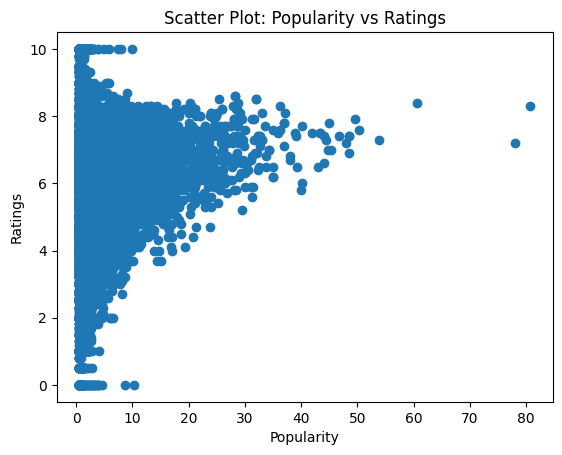

In [54]:
popularity_data = tmdb_movies['popularity']
ratings_data = tmdb_movies['vote_average']

# Create the scatter plot
plt.scatter(popularity_data, ratings_data, color='tab:blue')

# Set the title and labels
plt.title('Scatter Plot: Popularity vs Ratings')
plt.xlabel('Popularity')
plt.ylabel('Ratings')

# Display the plot
plt.show()

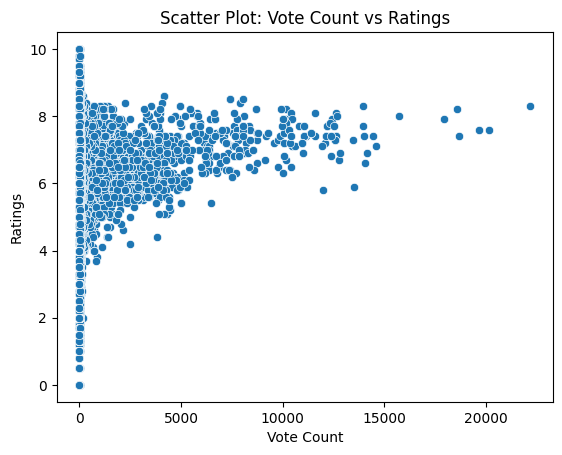

In [55]:
# compare vote_count and rating

vote_count_data = tmdb_movies['vote_count']
ratings_data = tmdb_movies['vote_average']

# Create the scatter plot using Seaborn
sns.scatterplot(x=vote_count_data, y=ratings_data, color='tab:blue')

# Set the title and labels
plt.title('Scatter Plot: Vote Count vs Ratings')
plt.xlabel('Vote Count')
plt.ylabel('Ratings')

# Display the plot
plt.show()

In [68]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [69]:
movie_budgets['production_budget'].head()

0    $425,000,000
1    $410,600,000
2    $350,000,000
3    $330,600,000
4    $317,000,000
Name: production_budget, dtype: object

In [70]:
# Remove non-numeric characters and convert to numeric data type
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace(r'[^0-9]', '', regex=True).astype(float)

movie_budgets['production_budget'].head()

0    425000000.0
1    410600000.0
2    350000000.0
3    330600000.0
4    317000000.0
Name: production_budget, dtype: float64

In [73]:
# Convert currency columns to numeric values (remove '$' and commas, and convert to float)
currency_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in currency_columns:
    movie_budgets[col] = movie_budgets[col].replace('[\$,]', '', regex=True).astype(float)

# Calculate profit/loss differences between production budgets and domestic gross
movie_budgets['domestic_profit_loss'] = movie_budgets['domestic_gross'] - movie_budgets['production_budget']

# Calculate profit/loss differences between production budgets and worldwide gross
movie_budgets['worldwide_profit_loss'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']

# Find movies with the highest return profit (domestic)
highest_domestic_profit = movie_budgets.loc[movie_budgets['domestic_profit_loss'].idxmax()]

# Find movies with the highest return profit (worldwide)
highest_worldwide_profit = movie_budgets.loc[movie_budgets['worldwide_profit_loss'].idxmax()]

# Display movies with the highest return profit (domestic and worldwide)
print("Movie with the highest return profit (Domestic):")
print(highest_domestic_profit[['movie', 'domestic_profit_loss']])

print("\nMovie with the highest return profit (Worldwide):")
print(highest_worldwide_profit[['movie', 'worldwide_profit_loss']])


Movie with the highest return profit (Domestic):
movie                   Star Wars Ep. VII: The Force Awakens
domestic_profit_loss                             630662225.0
Name: 5, dtype: object

Movie with the highest return profit (Worldwide):
movie                          Avatar
worldwide_profit_loss    2351345279.0
Name: 0, dtype: object


In [75]:
# Sort by domestic profit/loss and get the top 10 movies
top_ten_domestic_profit = movie_budgets.nlargest(10, 'domestic_profit_loss')[['movie', 'domestic_profit_loss']]

# Sort by worldwide profit/loss and get the top 10 movies
top_ten_worldwide_profit = movie_budgets.nlargest(10, 'worldwide_profit_loss')[['movie', 'worldwide_profit_loss']]

# Display top ten movies with the highest return profit (domestic)
print("Top ten movies with the highest return profit (Domestic):")
print(top_ten_domestic_profit)

print("\nTop ten movies with the highest return profit (Worldwide):")
print(top_ten_worldwide_profit)


Top ten movies with the highest return profit (Domestic):
                                     movie  domestic_profit_loss
5     Star Wars Ep. VII: The Force Awakens           630662225.0
41                           Black Panther           500059566.0
42                                 Titanic           459363944.0
3464          Star Wars Ep. IV: A New Hope           449998007.0
33                          Jurassic World           437270625.0
3525             ET: The Extra-Terrestrial           424610554.0
43                           Incredibles 2           408581744.0
26                            The Avengers           398279547.0
6                   Avengers: Infinity War           378815482.0
692                                Shrek 2           371226247.0

Top ten movies with the highest return profit (Worldwide):
                                             movie  worldwide_profit_loss
0                                           Avatar           2.351345e+09
42                 

In [86]:
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            235 non-null    int64  
 1   synopsis      235 non-null    object 
 2   rating        235 non-null    object 
 3   genre         235 non-null    object 
 4   director      235 non-null    object 
 5   writer        235 non-null    object 
 6   theater_date  235 non-null    object 
 7   dvd_date      235 non-null    object 
 8   currency      235 non-null    object 
 9   box_office    235 non-null    float64
 10  runtime       235 non-null    object 
 11  studio        235 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 23.9+ KB


In [77]:
# Converting box_office column to numeric values (removing $ sign)
rt_movies['box_office'] = rt_movies['box_office'].replace('[\$,]', '', regex=True).astype(float)

# Grouping by genre and calculating mean box office revenue for each genre
genre_mean_box_office = rt_movies.groupby('genre')['box_office'].mean().sort_values(ascending=False)

# The top 5 genres with highest average box office revenue
top_5_genres = genre_mean_box_office.head(5)
print(top_5_genres)


genre
Kids and Family|Science Fiction and Fantasy               2.618359e+08
Science Fiction and Fantasy                               1.908711e+08
Action and Adventure|Science Fiction and Fantasy          1.420119e+08
Action and Adventure|Drama|Science Fiction and Fantasy    1.391112e+08
Drama|Horror|Mystery and Suspense|Romance                 1.285797e+08
Name: box_office, dtype: float64


## DATA MODELING

Using the findings

In [104]:
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            235 non-null    int64 
 1   synopsis      235 non-null    object
 2   rating        235 non-null    object
 3   genre         235 non-null    object
 4   director      235 non-null    object
 5   writer        235 non-null    object
 6   theater_date  235 non-null    object
 7   dvd_date      235 non-null    object
 8   currency      235 non-null    object
 9   box_office    235 non-null    object
 10  runtime       235 non-null    object
 11  studio        235 non-null    object
dtypes: int64(1), object(11)
memory usage: 23.9+ KB


In [108]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33988 entries, 0 to 54424
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          33988 non-null  int64 
 1   review      33988 non-null  object
 2   rating      33988 non-null  object
 3   fresh       33988 non-null  object
 4   critic      33988 non-null  object
 5   top_critic  33988 non-null  int64 
 6   publisher   33988 non-null  object
 7   date        33988 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.3+ MB


In [127]:
import sqlite3
conn = sqlite3.connect('../im.db')


In [128]:
import pandas as pd
import sqlite3

connection = sqlite3.connect('../im.db')
cursor = connection.cursor()

# Execute the SQL query
cursor.execute('SELECT * FROM movie_ratings JOIN movies_basics ON movie_ratings.movie_id = movies_basics.movie_id;')

# Fetch the results
results = cursor.fetchall()

# Close the connection
connection.close()

# Print the results
for row in results:
    print(row)

OperationalError: no such table: movie_ratings

In [122]:
q = """
SELECT * 
FROM movie_ratings;
"""
q1 = pd.read_sql(q, conn)
q1

DatabaseError: Execution failed on sql '
SELECT * 
FROM movie_ratings;
': no such table: movie_ratings

In [121]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [107]:
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


## CONCLUSIONS 

## RECOMMENDATION